# Importing necessary libraries and processing data

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [116]:
data = pd.DataFrame({
    "x" : [1, 2, 3, 4, 5],
    "y" : [2, 4, 5, 4, 5]
})
data

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


# Initial Data Visualization

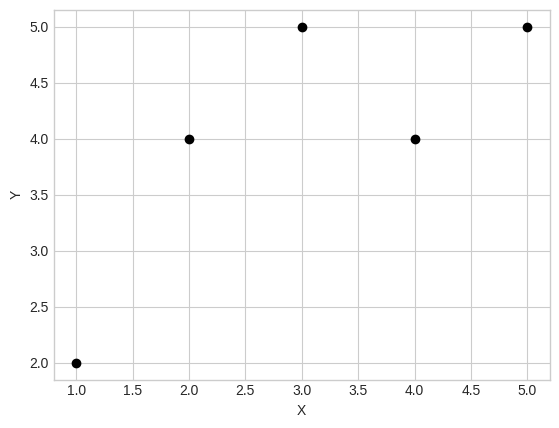

In [117]:
def first_graph():
    plt.scatter(data["x"], data["y"], color = "black")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
first_graph()

# Visualization of centered data

In [118]:
centered_data = data - data.mean()
centered_data

,x,y
0,-2.0,-2.0
1,-1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,2.0,1.0


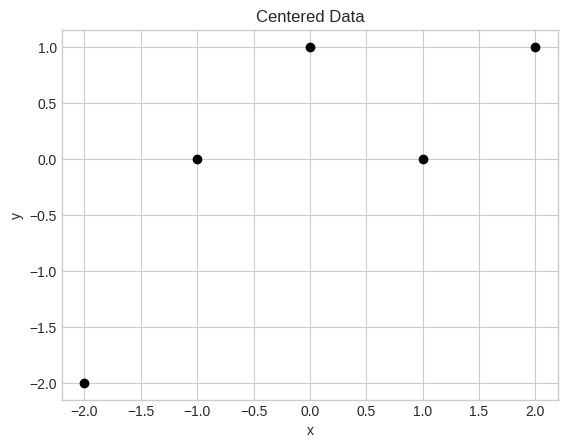

In [119]:
def centered_graph():
    plt.scatter(centered_data["x"], centered_data["y"], color = "black")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Centered Data")
    plt.show()
c_graph = centered_graph()
c_graph

# Creating a covariance matrix

In [120]:
cov_matrix = np.dot(centered_data.T, centered_data) / (len(centered_data) - 1)
cov_matrix = pd.DataFrame(cov_matrix, columns = ["x", "y"], index = ["x", "y"])
cov_matrix

,x,y
x,2.5,1.5
y,1.5,1.5


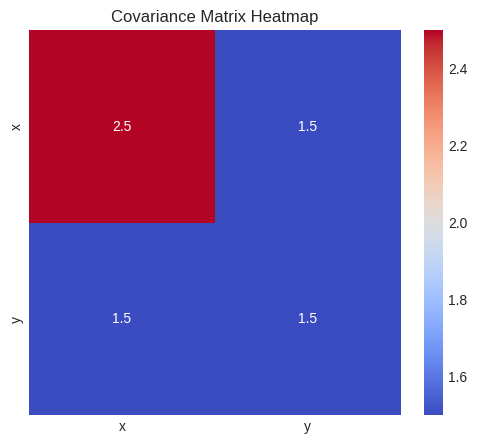

In [121]:
plt.figure(figsize=(6, 5))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm")
plt.title("Covariance Matrix Heatmap")
plt.show()

# Eigenvalues, Eigenvectors

In [122]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"The eigenvalues is \n{eigenvalues}")
print(f"The eigenvectors is \n{eigenvectors}")

The eigenvalues is 
[3.58113883 0.41886117]
The eigenvectors is 
[[ 0.81124219 -0.58471028]
 [ 0.58471028  0.81124219]]


In [123]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]
print(f"The sorted eigenvalues is \n{eigenvalues}")
print(f"The sorted eigenvectors is \n{eigenvectors}")

The sorted eigenvalues is 
[3.58113883 0.41886117]
The sorted eigenvectors is 
[[ 0.81124219 -0.58471028]
 [ 0.58471028  0.81124219]]


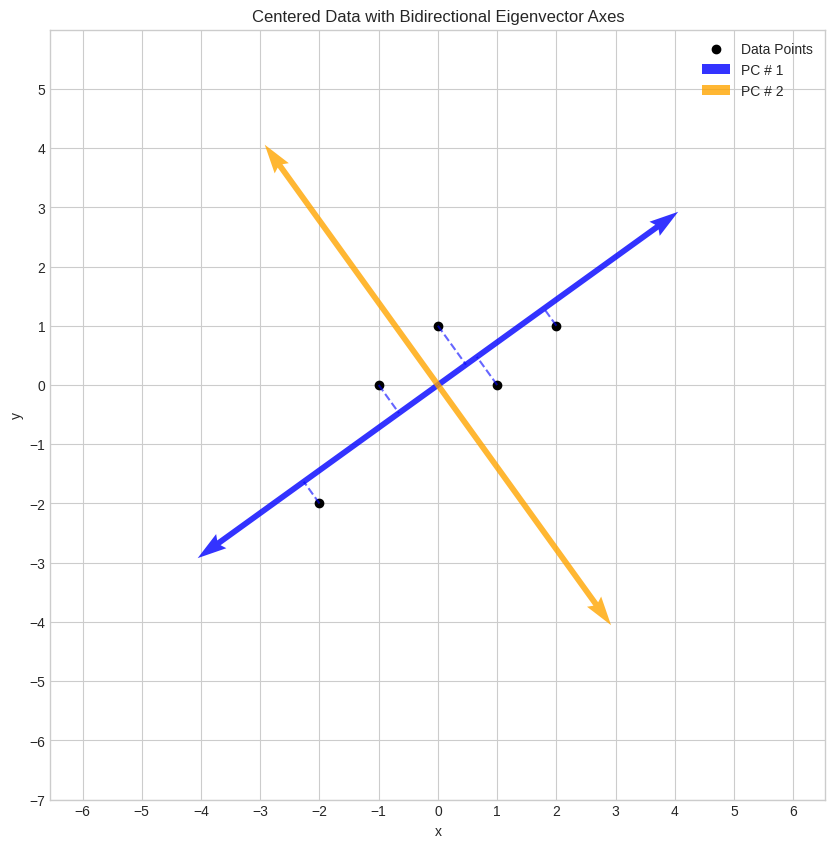

In [124]:
def centered_graph_with_bidirectional_eigenvectors(centered_data, eigenvalues, eigenvectors):

    plt.figure(figsize=(10, 10))
    plt.scatter(centered_data["x"], centered_data["y"], color="black", label="Data Points")
    plt.xticks(np.arange(centered_data["x"].min() - 5, centered_data["x"].max() + 5, 1))
    plt.yticks(np.arange(centered_data["y"].min() - 5, centered_data["y"].max() + 5, 1))

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Centered Data with Bidirectional Eigenvector Axes")

    scale_factor = 5
    origin = np.mean(centered_data, axis=0)
    
    for i in range(len(eigenvalues)):
        color = "blue" if i == 0 else "orange"
        label = "PC # 1" if i == 0 else "PC # 2"
        
        plt.quiver(
            origin.iloc[0], origin.iloc[1],
            eigenvectors[0, i] * scale_factor,
            eigenvectors[1, i] * scale_factor,
            angles="xy", 
            scale_units="xy", 
            scale= 1, 
            color=color, 
            alpha=0.8, 
            linewidth=2, 
            label=label
        )
        plt.quiver(
            origin.iloc[0], 
            origin.iloc[1],
            -eigenvectors[0, i] * scale_factor,
            -eigenvectors[1, i] * scale_factor,
            angles="xy", 
            scale_units="xy",
            scale= 1,
            color=color, 
            alpha=0.8, 
            linewidth=2
        )

    centered_data_array = centered_data[["x", "y"]].values
    projections = centered_data_array @ eigenvectors
    
    for i in range(len(centered_data_array)):
        blue_vector = eigenvectors[:, 0]
        projection_on_blue = np.dot(centered_data_array[i], blue_vector) * blue_vector
        
        plt.plot(
            [centered_data_array[i, 0], projection_on_blue[0]],
            [centered_data_array[i, 1], projection_on_blue[1]],
            "b--", alpha=0.6  
        )

    plt.axis("equal")

    plt.xlim(centered_data["x"].min() - 5, centered_data["x"].max() + 5)
    plt.ylim(centered_data["y"].min() - 5, centered_data["y"].max() + 5)

    plt.legend()
    plt.show()

centered_graph_with_bidirectional_eigenvectors(centered_data, eigenvalues, eigenvectors)


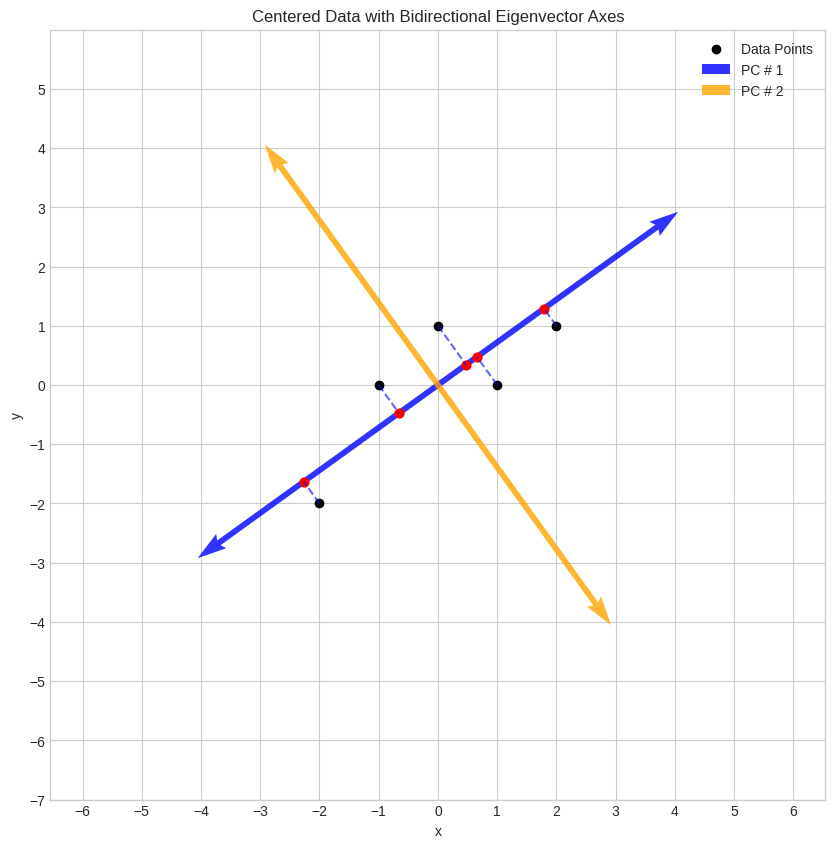

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def centered_graph_with_bidirectional_eigenvectors(centered_data, eigenvalues, eigenvectors):
    # Կենտրոնացված տվյալների գրաֆիկ
    plt.figure(figsize=(10, 10))
    plt.scatter(centered_data["x"], centered_data["y"], color="black", label="Data Points")
    plt.xticks(np.arange(centered_data["x"].min() - 5, centered_data["x"].max() + 5, 1))
    plt.yticks(np.arange(centered_data["y"].min() - 5, centered_data["y"].max() + 5, 1))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Centered Data with Bidirectional Eigenvector Axes")

    scale_factor = 5
    origin = np.array([0, 0])
    

    for i in range(len(eigenvalues)):
        color = "blue" if i == 0 else "orange"
        label = "PC # 1" if i == 0 else "PC # 2"
        
        plt.quiver(
            origin[0], origin[1],
            eigenvectors[0, i] * scale_factor,
            eigenvectors[1, i] * scale_factor,
            angles="xy", scale_units="xy", scale=1, 
            color=color, alpha=0.8, linewidth=2, 
            label=label
        )
        plt.quiver(
            origin[0], origin[1],
            -eigenvectors[0, i] * scale_factor,
            -eigenvectors[1, i] * scale_factor,
            angles="xy", scale_units="xy", scale=1, 
            color=color, alpha=0.8, linewidth=2
        )


    centered_data_array = centered_data[["x", "y"]].values
    projections = centered_data_array @ eigenvectors

    
    for i in range(len(centered_data_array)):
        blue_vector = eigenvectors[:, 0]
        projection_on_blue = np.dot(centered_data_array[i], blue_vector) * blue_vector
        

        plt.plot(
            [centered_data_array[i, 0], projection_on_blue[0]],
            [centered_data_array[i, 1], projection_on_blue[1]],
            "b--", 
            alpha=0.6  
        )
        
        plt.scatter(projection_on_blue[0], projection_on_blue[1], color="red", marker="o", s=40)

    plt.grid(True)
    plt.axis("equal")
    plt.xlim(centered_data["x"].min() - 5, centered_data["x"].max() + 5)
    plt.ylim(centered_data["y"].min() - 5, centered_data["y"].max() + 5)
    plt.legend()
    plt.show()


centered_graph_with_bidirectional_eigenvectors(centered_data, eigenvalues, eigenvectors)


# Data Projection in 1D Space

In [127]:
W = eigenvectors[:, 0]
W

array([0.81124219, 0.58471028])

In [128]:
X_projected = np.dot(centered_data, W)
X_projected

array([-2.79190494, -0.81124219,  0.58471028,  0.81124219,  2.20719466])

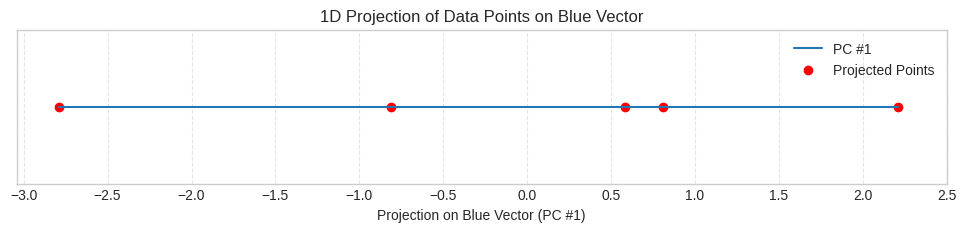

In [137]:
def plot_1d_projection_line(centered_data,  eigenvalues, eigenvectors):
    # Ստանում ենք կապույտ eigenvector-ը (PC #1)
    blue_vector = eigenvectors[:, 0]
    # Հաշվում ենք պրոյեկցիաները կապույտ eigenvector-ի ուղղությամբ (1D կոորդինատներ)
    centered_data_array =  centered_data[["x","y"]].values
    projections_1d_values = np.dot(centered_data_array, blue_vector)
    
    # Ստեղծում ենք 1D գծային գրաֆիկը՝ պրոյեկցիաների հետ
    plt.figure(figsize=(12, 2))
    
    # Գծում ենք 1D գիծը՝ պրոյեկցիայի կետերով
    plt.plot(projections_1d_values, np.zeros_like(projections_1d_values), '-', label="PC #1")
    plt.scatter(projections_1d_values, np.zeros_like(projections_1d_values), color="red", marker="o", label="Projected Points")
    
    plt.xlabel("Projection on Blue Vector (PC #1)")
    plt.xticks(np.arange(centered_data["x"].min() - 1, centered_data["x"].max() + 1, 0.5))
    plt.yticks([])  # Հեռացնում ենք y առանցքը
    plt.title("1D Projection of Data Points on Blue Vector")
    plt.legend()
    plt.grid(True, axis='x', linestyle="--", alpha=0.5)
    plt.show()

# Կանչում ենք ֆունկցիան
plot_1d_projection_line(centered_data, eigenvalues, eigenvectors)


In [133]:
total_variance = np.sum(eigenvalues)

explained_variance = np.sum(eigenvalues[:2])

information_loss = 1 - (explained_variance / total_variance)

# Տպում ենք արդյունքները
print(f"Total variance: {total_variance}")
print(f"Explained variance (by selected components): {explained_variance}")
print(f"Information loss: {information_loss * 100:.2f}%")

Total variance: 4.0
Explained variance (by selected components): 4.0
Information loss: 0.00%


# Check the answer with the library

In [134]:
pca = PCA(n_components=1)
X_projected_lib = pca.fit_transform(centered_data)

# Showing library results for projection and components
print("Projected Data using Library PCA:\n", X_projected_lib)
print("Eigenvalues (explained variance) using Library PCA:\n", pca.explained_variance_)
print("Eigenvectors (components) using Library PCA:\n", pca.components_)

Projected Data using Library PCA:
 [[-2.79190494]
 [-0.81124219]
 [ 0.58471028]
 [ 0.81124219]
 [ 2.20719466]]
Eigenvalues (explained variance) using Library PCA:
 [3.58113883]
Eigenvectors (components) using Library PCA:
 [[0.81124219 0.58471028]]
